<a href="https://colab.research.google.com/github/Griznt/colab_test_tasks/blob/main/odkl_test_task_akramovmv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Тестовое задание. Акрамов Михаил

# Типичная задача продуктового аналитика:
Представь, что ты продуктовый аналитик в Instagram и отвечаешь за
аналитику продукта Истории (Stories). Спустя несколько месяцев после его
запуска тебя попросили собрать продуктовый дашборд про успешность
запуска, первые результаты работы этого продукта и его влияния на весь
продукт Instagram.

Напиши, пожалуйста, метрики, которые бы ты отобразил на этом дашборде в
порядке убывания важности (здорово если построишь пирамиду/иерархию
метрик)


### Решение

Истории - это очень важная часть приложения Instagram, т.к. пользователи, которые создают контент, привлекают пользователей, которые его потребляют. Так называемая, петля роста.
И важнее тут именно создание Stories. Так как если их не будет, нечего будет и смотреть.
1. Количество создаваемых stories
  * Сколько всего создано Stories и как менялась динамика по дням
  * Количество Stories создаваемых одним пользователем
2. Количество просмотров Stories
  * сколько всего просмотров и динамика по дням
    * разбивка по категориям - с видео, с фото, с опросами, репост другого поста/другой истории
  * продолжительность просмотров
  * в какую сторону переключали Stories - swipe вперед, swipe назад, выход из Stories и тп.
3. количество рекламных постов в Stories (Stories from business profiles 
  * сколько всего постов
  * сколько было просмотрено
  * соотношение рекламных и пользовательсих постов
  * рекламная аналитика
    * количество переходов по рекламе
    * взаимодействий (комментарии, поделились и тп)
    * просмотр insights и тп (не знаю что там содержится, не пользовался бизнес-профилем)
4. Количество просмотров статистики истории:
  * кто уже смотрел твою историю
  * изменение количества подписчиков <-> количество созданных Stories
5. Количество Stories которые получили реакции: 
  * ответы
  * репосты
  * sharing
6. Количество Stories которые:
  * были сохранены в актуальное
  * были архивированы
  * удалены
  * которыми поделились
  * сохранены и неопубликованы
  * были созданы с использованием: 
    * фильтров
      * какие фильтры чаще используются
    * фото с камеры
    * загруженного фото
    * загруженного видео
    * другого пользовательского контента
    * были ограничены политикой конфиденциальности (только для друзей)
    * содержат упоминания других пользователей
7. Количество переходов из веб версии в mobile app

Чтобы оценить влияние Stories на весь продукт в целом, нужно оценить:
1. **время**, которое проводят пользователи в приложении: среднее, медианное. Посмотреть динамику. Сравнить когорту новых пользователей до запуска Stories и после. Или запустить A/B тест вместе с запуском Stories: сравнивать поведение пользователей в двух группах. 
2. **выручка** приложения от рекламы. Здесь важно, чтобы новая функциональность не нарушила работы всего приложения и пользователи не переключили внимание с другого функционала, который приносил прибыль
  * количество просмотров
  * средний чек
  * количество рекламодателей
3. DAU | WAU | MAU не должны просесть
  * **Retention** пользователей должен быть не хуже того, который был, а лучше выше - разных когорт и старых и новых, т.к. этот функционал способен увеличить проводимое время в приложении, создать новую активность и тп. - пользователи могут начать ползоваться приложением чаще - это надо отследить.
  * **Churn Rate** - сколько пользователей отваливается. Как эта метрика ведет себя со временем (до введения, после)?


# Типичный А/В тест продуктового аналитика:
На сайте запущен А/В тест с целью увеличить доход. В приложенном excel
файле ты найдешь сырые данные по результатам эксперимента (user_id), тип
выборки (variant_name) и доход, принесенный пользователем (revenue).
Проанализируй результаты эксперимента и напиши свои рекомендации
менеджеру.
(приложи скрипт с помощью которого анализировал данные, желательно
файл .ipynb на python)

### Решение

#### Заливка данных
Загрузим в локальную папку проекта файл с гугл диска

https://docs.google.com/spreadsheets/d/1tZ-zxT2C2DII0GIMQZGEJvdFNLcmfKTh/edit?usp=sharing&ouid=101542582788016542255

In [1]:
file_id = "1tZ-zxT2C2DII0GIMQZGEJvdFNLcmfKTh"
!gdown https://drive.google.com/uc?id={file_id}

Downloading...
From: https://drive.google.com/uc?id=1tZ-zxT2C2DII0GIMQZGEJvdFNLcmfKTh
To: /content/AB_Test_Results(odkl).xlsx
100% 189k/189k [00:00<00:00, 70.8MB/s]


In [2]:
import pandas as pd
import numpy as np

In [89]:
df = pd.read_excel('/content/AB_Test_Results(odkl).xlsx')

In [90]:
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [91]:
df.columns = df.columns.str.lower()

#### Анализ A/B теста

Оценим датасет

In [92]:
df.describe()

,user_id,revenue
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [93]:
df.nunique()

user_id         6324
variant_name       2
revenue          101
dtype: int64

Отсутствует описание эксперимента: 
* нет описания
 * вносимых изменений в исходную версию
 * порогового значения метрик, при которых мы сможем сказать - полученное изменение это хорошо или плохо (например: метрика X улучшена на 0.2%. Это хорошо или плохо? Стоит катить эксперимент или нет?)
* нет информации о сроках проведения эксперимента. Отсюда следует, что невозможно знать, было ли влияние внешних факторов (праздники, сезонность и тп)
* нет информации о составе пользователей в группах: подсегменты в разбивке по платформам/устройствам/полу/возрасту должны быть сопоставимы

Оценим распределение по группам


In [94]:
df['variant_name'].value_counts()

variant    5016
control    4984
Name: variant_name, dtype: int64

Пользователи распределены в группы равномерно.

Посмотрим, нет ли пользователей, которые определены в обе группы сразу.


In [95]:
intersect_users = set(df[df['variant_name'] == 'variant']['user_id'])\
  .intersection(set(df[df['variant_name'] == "control"]['user_id']))


In [96]:
len(intersect_users)

1541

Целых 1541 пользователь попал в обе группы. Этих пользователей нужно исключить из анализа, т.к. они могли видеть два варианта и это могло сказаться на их пользовательском опыте. Мы не знаем.

In [97]:
df = df[~df['user_id'].isin(intersect_users)]

In [98]:
df.describe()

,user_id,revenue
count,6070.000000,6070.000000
mean,4983.664086,0.107064
std,2897.990118,2.673501
min,2.000000,0.000000
25%,2472.250000,0.000000
50%,4950.000000,0.000000
75%,7501.000000,0.000000
max,9998.000000,196.010000


Вот так вот выборка сократилась на 40%.

Посмотрим как сейчас пользователи распределены в группы

In [110]:
df['variant_name'].value_counts()

variant    3044
control    3026
Name: variant_name, dtype: int64

Пользователи распределены равномерно в обе группы, пересечений нет.

Пометим платящих пользователей. Если была оплата - ставим user_id, иначе NaN

In [128]:
df['is_purchaser'] = np.where(df['revenue'] > 0, df['user_id'], np.NaN)

In [132]:
df.nunique()

user_id         4783
variant_name       2
revenue           70
is_purchaser      96
dtype: int64

Можно заметить, что всего 4783 пользователя, из которых 96 платящих и всего 70 покупок.

In [134]:
 df[df['user_id'] == 7912]

,user_id,variant_name,revenue,is_purchaser
4575,7912,variant,2.16,7912.0
6344,7912,variant,1.25,7912.0


Сгруппируем по variant_name и посчитаем всего пользователей, уникальных пользователей, количество покупок, купивших уникальных и общую выручку.

In [182]:
groups = df.groupby('variant_name').agg({
    'user_id': ['count', 'nunique'],  
    'is_purchaser': ['count', 'nunique'],
    'revenue': ['sum', 'max']
}).reset_index()

In [183]:
groups

variant_name user_id         is_purchaser         revenue        
                 count nunique        count nunique     sum     max
0      control    3026    2390           54      54  470.56  196.01
1      variant    3044    2393           43      42  179.32   23.04

In [186]:
groups.columns = ['ab_group','users', 'unique_users', 'purchases_count', 'purchasers', 'total_revenue', 'max_revenue']

In [187]:
groups

,ab_group,users,unique_users,purchases_count,purchasers,total_revenue,max_revenue
0,control,3026,2390,54,54,470.56,196.01
1,variant,3044,2393,43,42,179.32,23.04


Сейчас посчитаем количество покупок на одного пользователя, ARPU, ARPPU и процент платящих

In [188]:
groups['purchases_per_user'] = groups['purchases_count'] / groups['purchasers']

In [189]:
groups['arpu'] = groups['total_revenue'] / groups['unique_users']

In [190]:
groups['arppu'] = groups['total_revenue'] / groups['purchasers']

In [191]:
groups['paying_share'] = groups['purchasers'] / groups['unique_users'] * 100

In [192]:
groups['average_check'] = groups['total_revenue'] / groups['purchases_count']

#### Выводы

In [193]:
groups

,ab_group,users,unique_users,purchases_count,purchasers,total_revenue,max_revenue,purchases_per_user,arpu,arppu,paying_share,average_check
0,control,3026,2390,54,54,470.56,196.01,1.00000,0.196887,8.714074,2.259414,8.714074
1,variant,3044,2393,43,42,179.32,23.04,1.02381,0.074935,4.269524,1.755119,4.170233


Как можно заметить, в тестовой группе процент платящих ниже, чем в контрольной.
Также выручка на одного пользователя и выручка на одного платящего выше в контрольной группе, чем в тестовой.
Выше и средний чек в контрольной группе.
В тестовой группе лучше только количество покупок на платящего пользователя, однако это всего один пользователь сделал повторную покупку, это может быть случайность.

Уже, видя такие результаты, хочется сказать, что очевидно, что показатели в контрольной группе лучше, я бы оценил эксперимент как не удачный.

Однако, хочу отметить **еще раз**, что я не вижу всей картины:
1. нет дизайна эксперимента
2. нет описания проделанного изменения
3. нет описания того, что хотели померить и какое изменение ожидалось
4. данные, доступные для анализа содержат только данные по сумме и id пользователя и его группе. Мы не знаем сколько длился эксперимент, в какие дни были покупки и тп. Не можем проверить распределение пользователей по полу/возрасту/типу устройства/ ОС устройства и тп.


# Задание #3: SQL

##  Обычная SQL задача 1
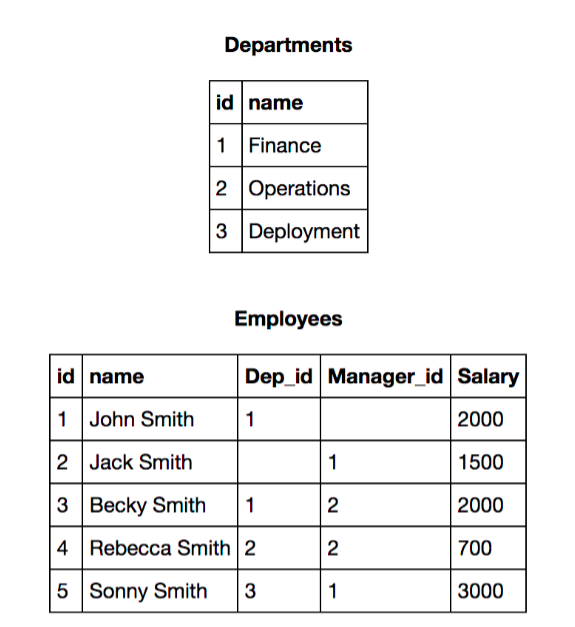

Используя таблицы выше, напиши следующие SQL запросы:

a) Для каждого сотрудника найти его департамент, включая тех, у кого
департамента нет

b) Найти наибольшую зарплату по департаментам и отсортировать
департаменты по убыванию максимальной зарплаты

### Решение

#### Заливка данных

Для начала подключим sqlite (скачаем свежий образ, поддерживающий оконные функции)

In [ ]:
!gdown --id 1BSHIKQ7rFw5BpTq5nw1UZfjPK_7Mpnbi
!mv _sqlite3.cpython-37m-x86_64-linux-gnu.so /usr/lib/python3.7/lib-dynload/
import os
os.kill(os.getpid(), 9)

Downloading...
From: https://drive.google.com/uc?id=1BSHIKQ7rFw5BpTq5nw1UZfjPK_7Mpnbi
To: /content/_sqlite3.cpython-37m-x86_64-linux-gnu.so
6.33MB [00:00, 55.4MB/s]


In [ ]:
import sqlite3
import pandas as pd
import numpy as np

In [ ]:
sqlite3.sqlite_version

'3.36.0'

In [ ]:
con = sqlite3.connect('db')

Сгенерируем тестовые данные

In [ ]:
cur = con.cursor()

In [ ]:
sql = '''
drop table if exists departments;

create table departments (id integer PRIMARY KEY, name varchar(255) NOT NULL);

insert into departments values
  (1, 'Finance'), 
  (2, 'Operations'),
  (3, 'Deployment');
'''

In [ ]:
cur.executescript(sql)

Создадим функцию выполнения запроса SQL чтобы удобно к ней обращаться

In [ ]:
def select(sql):
  return pd.read_sql(sql, con)

Проверим, что все корректно создалось и заполнилось

In [ ]:
sql = '''select t.* from departments t'''

In [ ]:
select(sql)

,id,name
0,1,Finance
1,2,Operations
2,3,Deployment


In [ ]:
sql = '''
drop table if exists employees;
create table employees (id integer PRIMARY KEY, name varchar(255) NOT NULL, dep_id integer,  manager_id integer, salary integer);

insert into employees values
(1, 'John Smith', 1, null, 2000),
(2, 'Jack Smith', null, 1, 1500),
(3, 'Becky Smith', 1, 2, 2000),
(4, 'Rebecca Smith', 2, 2, 700),
(5, 'Sonny Smith', 3, 1, 3000);
'''

In [ ]:
cur.executescript(sql)

In [ ]:
sql = '''select t.* from employees t'''

In [ ]:
select(sql)

,id,name,dep_id,manager_id,salary
0,1,John Smith,1.0,NaN,2000
1,2,Jack Smith,NaN,1.0,1500
2,3,Becky Smith,1.0,2.0,2000
3,4,Rebecca Smith,2.0,2.0,700
4,5,Sonny Smith,3.0,1.0,3000


Приступим к выполнению задания.
#### а) Для каждого сотрудника найти его депаратамент, включая тех, у кого депаратамента нет

Не совсем понятно из задания, что надо найти, если этого нет.

А, я понял. Вероятно, имелось ввиду, если нет департамента, но общий руководитель (manager_id), скорее всего они принадлежат к одному департаменту (ну, или будут принадлежать, не будем вдаваться в проблемы этой организации)

По сути, в этой задаче нам надо проставить недостающий dep_id тем, у кого имеется manager_id, а потом просто приджойнить таблицу с названиями департаментов к таблице с работниками.

А перед этим восстановим недостающие manager_id тем, у кого есть  dep_id и отсутствует manager_id

Для этого я проставлю минимальный manager_id (если их попадется несколько) для среди пользователей в том же депаратаменте

In [ ]:
sql = '''
select 
t.*, 
min (t.manager_id) over (partition by t.dep_id) as new_manager_id 
from employees t
order by id
'''

In [ ]:
select(sql)

,id,name,dep_id,manager_id,salary,new_manager_id
0,1,John Smith,1.0,NaN,2000,2
1,2,Jack Smith,NaN,1.0,1500,1
2,3,Becky Smith,1.0,2.0,2000,2
3,4,Rebecca Smith,2.0,2.0,700,2
4,5,Sonny Smith,3.0,1.0,3000,1


Теперь проставим недостающие номера департаментов

In [ ]:
sql = '''
with updated_managers as (
  select t.*,
    min (t.manager_id) over (partition by t.dep_id) as new_manager_id
from employees t)

  select t.*, 
  min (t.dep_id) over (partition by t.new_manager_id) as new_dep_id
from updated_managers t
order by id
'''

In [ ]:
select(sql)

,id,name,dep_id,manager_id,salary,new_manager_id,new_dep_id
0,1,John Smith,1.0,NaN,2000,2,1
1,2,Jack Smith,NaN,1.0,1500,1,3
2,3,Becky Smith,1.0,2.0,2000,2,1
3,4,Rebecca Smith,2.0,2.0,700,2,1
4,5,Sonny Smith,3.0,1.0,3000,1,3


Так как у некоторых сотрудников в одном департаменте может быть несколько менеджеров, а я взял функцию min, то пользователям, у кого уже был dep_id проставится некорректный. Для этого напишем еще один запрос, который проставит новый dep_id только для тех, у кого изначально он отсутствовал

In [ ]:
sql = '''
with updated_managers as (
  select t.*,
    min (t.manager_id) over (partition by t.dep_id) as new_manager_id
from employees t),

updated_deps as (
  select t.*, 
  min (t.dep_id) over (partition by t.new_manager_id) as new_dep_id
from updated_managers t)

select 
  t.id, t.name, 
  case when t.dep_id is NULL then t.new_dep_id else t.dep_id end as dep_id,
  t.new_manager_id as manager_id,
  t.salary
from updated_deps t
order by id
'''

In [ ]:
select(sql)

,id,name,dep_id,manager_id,salary
0,1,John Smith,1,2,2000
1,2,Jack Smith,3,1,1500
2,3,Becky Smith,1,2,2000
3,4,Rebecca Smith,2,2,700
4,5,Sonny Smith,3,1,3000


#### б) Найти наибольшую зарплату по департаментам и отсортировать департаменты по убыванию максимальной зарплаты
Найдем максимальную зарплату для каждого департамента, и выведем в убывающем порядке

In [ ]:
sql = '''
with updated_managers as (
  select t.*,
    min (t.manager_id) over (partition by t.dep_id) as new_manager_id
from employees t),

updated_deps as (
  select t.*, 
  min (t.dep_id) over (partition by t.new_manager_id) as new_dep_id
from updated_managers t),

updated_employees as (select 
  t.id, t.name, 
  case when t.dep_id is NULL then t.new_dep_id else t.dep_id end as dep_id,
  t.new_manager_id as manager_id,
  t.salary
from updated_deps t)

select 
  t.dep_id, max(t.salary) as max_salary
from updated_employees t
group by 1
order by max_salary desc
'''

In [ ]:
select(sql)

,dep_id,max_salary
0,3,3000
1,1,2000
2,2,700


## Обычная SQL задача 2
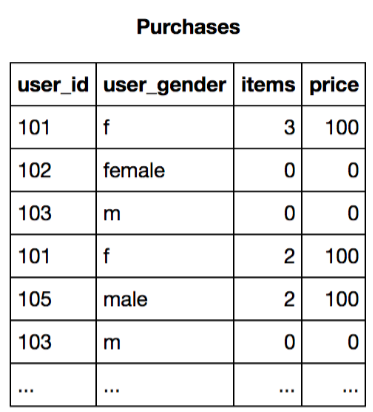

Используя таблицу выше, напиши следующие SQL запросы:

a) Посчитай доход с женской аудитории (доход= сумма price*items)

b) Сравни доход по группе мужчин и женщин

c) Посчитай кол-во уникальных пользователей-мужчин, заказавших
более чем три айтема (суммарно за все заказы).

### Решение

#### Заливка данных

In [ ]:
sql = '''
drop table if exists purchases;

create table purchases (user_id integer, user_gender varchar(10), items integer, price integer);

insert into purchases values
(101, 'f', 3, 100),
(102, 'female', 0, 0),
(103, 'm', 0, 0),
(101, 'f', 2, 100),
(105, 'male', 2, 100),
(103, 'm', 0, 0)
'''

In [ ]:
cur.executescript(sql)

In [ ]:
sql = '''
select t.* from purchases t
'''

In [ ]:
select(sql)

,user_id,user_gender,items,price
0,101,f,3,100
1,102,female,0,0
2,103,m,0,0
3,101,f,2,100
4,105,male,2,100
5,103,m,0,0


#### а) Посчитай доход с женской аудитории (доход= сумма price*items)

Сначала посчитаем revenue и сразу добавим новый столбец с полом в едином формате

In [ ]:
sql = '''
select 
  t.*,
  (t.items * t.price) as revenue,
  case when t.user_gender like 'f%' then 'f' else 'm' end as gender
from purchases t
'''

In [ ]:
select(sql)

,user_id,user_gender,items,price,revenue,gender
0,101,f,3,100,300,f
1,102,female,0,0,0,f
2,103,m,0,0,0,m
3,101,f,2,100,200,f
4,105,male,2,100,200,m
5,103,m,0,0,0,m


Теперь осталось сгруппировать по полу и просуммировать revenue. Вижу, что есть разные записи у одного и того же пользователя, их нужно просто сложить, никакой обработки по каждому пользователю отдельно не требуется.

In [ ]:
sql = '''
with purchases_extended as (
select 
  t.*,
  (t.items * t.price) as revenue,
  case when t.user_gender like 'f%' then 'f' else 'm' end as gender
from purchases t
)

select 
  t.gender,
  sum(t.revenue) as revenue
from purchases_extended t
  group by 1
  having t.gender like 'f'
'''

In [ ]:
select(sql)

,gender,revenue
0,f,500


#### б) Сравни доход по группе мужчин и женщин

В принципе, это получилось в предыдущем задании.
Мы видим, что суммарный доход у женщин больше.

In [ ]:
sql = '''
with purchases_extended as (
select 
  t.*,
  (t.items * t.price) as revenue,
  case when t.user_gender like 'f%' then 'f' else 'm' end as gender
from purchases t
)

select 
  t.gender,
  sum(t.revenue) as revenue
from purchases_extended t
  group by 1
'''

In [ ]:
select(sql)

,gender,revenue
0,f,500
1,m,200


Копнем чуть глубже и посчитаем ARPU и ARPPU.

Для этого нам надо знать сколько всего пользователей есть в каждой группе и сколько платящих пользователей.

Пометим платящих пользователей флагом 1, если была хотя бы одна покупка

In [ ]:
sql = '''
with purchases_extended as (
select 
  t.*,
  (t.items * t.price) as revenue,
  case when t.user_gender like 'f%' then 'f' else 'm' end as gender,
  case when t.price > 0 then 1 else 0 end as purchaser
from purchases t)

select  
  t.user_id,
  t.gender,
  sum(t.revenue) as revenue,
  max(t.purchaser) as purchaser,
  sum(t.purchaser) as purchases_count
from purchases_extended t
  group by 1, 2
'''

In [ ]:
select(sql)

,user_id,gender,revenue,purchaser,purchases_count
0,101,f,500,1,2
1,102,f,0,0,0
2,103,m,0,0,0
3,105,m,200,1,1


А теперь сгруппируем по полу и посчитаем суммарную выручку, количество пользователей и количество платящих пользователей, а также ARPU и ARPPU:

In [ ]:
sql = '''
with purchases_extended as (
select 
  t.*,
  (t.items * t.price) as revenue,
  case when t.user_gender like 'f%' then 'f' else 'm' end as gender,
  case when t.price > 0 then 1 else 0 end as purchaser
from purchases t
),

purchases_agg as (select  
  t.user_id,
  t.gender,
  sum(t.revenue) as revenue,
  max(t.purchaser) as purchaser,
  sum(t.purchaser) as purchases_count,
  avg(t.revenue) as avg_check
from purchases_extended t
  group by 1, 2)

select 
  t.gender,
  sum(t.revenue) as revenue,
  count(1) as users_count,
  sum(t.purchaser) as purchasers_count,
  (sum(t.revenue) / count(1)) as ARPU,
  (sum(t.revenue) / sum(t.purchaser)) as ARPPU,
  (sum(t.avg_check) / sum(t.purchaser)) as avg_check
  
from purchases_agg t
  group by 1
'''

In [ ]:
select(sql)

,gender,revenue,users_count,purchasers_count,ARPU,ARPPU,avg_check
0,f,500,2,1,250,500,250.0
1,m,200,2,1,100,200,200.0


Из таблицы выше можно сделать следующие выводы:
1. Женская и мужская аудитории имеют схожее количество людей
2. Общая выручка у женской аудитории выше
3. У женской аудитории выше средний чек
4. У женской аудитории выше выручка на одного пользователя
5. У женской аудитории выше выручка на одного платящего пользователя

#### в) Посчитай кол-во уникальных пользователей-мужчин, заказавших более чем три айтема (суммарно за все заказы).

In [ ]:
sql = '''
with purchases_extended as (
select 
  t.*,
  case when t.user_gender like 'f%' then 'f' else 'm' end as gender
from purchases t)

select 
  t.user_id,
  t.gender,
  sum(t.items) items_count
from purchases_extended t
  group by 1, 2
'''

In [ ]:
select(sql)

,user_id,gender,items_count
0,101,f,5
1,102,f,0
2,103,m,0
3,105,m,2


Видим, что удалось посчитать суммарное количество item у каждого пользователя.

Осталось в условие фильтрации добавить что количество item > 3 и пол - мужской. И посчитать количество 

In [ ]:
sql = '''
with purchases_extended as (
select 
  t.*,
  case when t.user_gender like 'f%' then 'f' else 'm' end as gender
from purchases t),

purchases_count as (select 
  t.user_id,
  t.gender,
  sum(t.items) items_count
from purchases_extended t
  group by 1, 2
  having items_count > 3
  and gender = 'm')

select count(1) as uniq_male_users_more_than_3_items
 from purchases_count t
'''

In [ ]:
select(sql)

,uniq_male_users_more_than_3_items
0,0


Добавим еще тестовых данных, чтобы убедиться, что решение верное:

In [ ]:
sql = '''
insert into purchases values
(106, 'm', '3','530'),
(103, 'm', '1','430'),
(104, 'm', '3','330'),
(104, 'm', '1','230'),
(107, 'm', '30','130')
'''

In [ ]:
con.executescript(sql)

In [ ]:
sql = '''select t.* from purchases t'''

In [ ]:
select(sql)

,user_id,user_gender,items,price
0,101,f,3,100
1,102,female,0,0
2,103,m,0,0
3,101,f,2,100
4,105,male,2,100
5,103,m,0,0
6,106,m,3,530
7,103,m,1,430
8,104,m,3,330
9,104,m,1,230


Теперь выполним еще раз код, где мы считаем количество уникальных пользователей-мужчин заказавших более чем 3 items

In [ ]:
sql = '''
with purchases_extended as (
select 
  t.*,
  case when t.user_gender like 'f%' then 'f' else 'm' end as gender
from purchases t),

purchases_count as (select 
  t.user_id,
  t.gender,
  sum(t.items) items_count
from purchases_extended t
  group by 1, 2
  having items_count > 3
  and gender = 'm')

select count(1) as uniq_male_users_more_than_3_items
 from purchases_count t
'''

In [ ]:
select(sql)

,uniq_male_users_more_than_3_items
0,2


Если посмотреть на обновленные данные то можно заметить, что там действительно всего два пользователя-мужчины имеют количество покупок строго больше 3.

Это пользователь с id = 107 и id = 104

Задача решена верно.



## Не самая обычная SQL задача 3
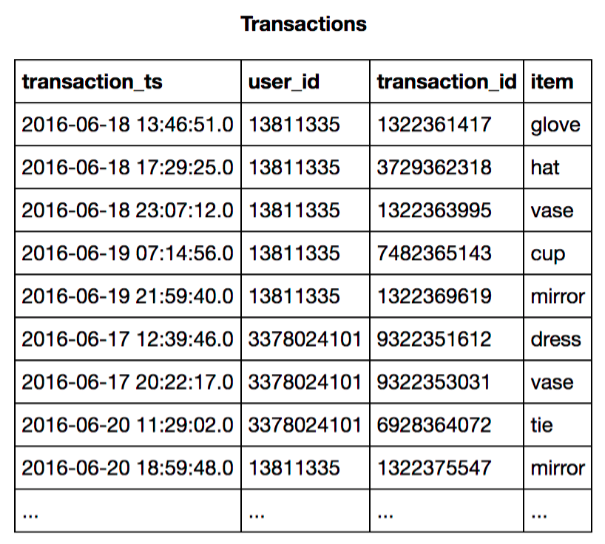



Каждый пользователь имеет набор транзакций с определенным
временем. Используя таблицы выше, напиши НАИБОЛЕЕ ОПТИМАЛЬНЫЕ
SQL запросы:

a) Выведи для каждого пользователя первое наименование, которое он
заказал (первое по времени транзакции)

b) Посчитай сколько транзакций в среднем делает каждый пользователь
в течении 72х часов с момента первой транзакции

### Решение

#### Заливка данных

In [ ]:
sql = '''
drop table if exists transactions;

create table transactions (
  ts datetime,
  user_id integer,
  id integer NOT NULL, 
  item varchar(100));

insert into transactions values
('2016-06-18 13:46:51.0', 13811335, 1322361417, 'glove'),
('2016-06-18 17:29:25.0', 13811335, 1322361417, 'hat'),
('2016-06-18 23:07:12.0', 13811335, 1322363995, 'vase'),
('2016-06-19 07:14:56.0', 13811335, 7482367143, 'cup'),
('2016-06-19 21:59:40.0', 13811335, 1322369619, 'mirror'),

('2016-06-17 12:39:46.0', 3378024101, 9322351612, 'dress'),
('2016-06-17 20:22:17.0', 3378024101, 9322353031, 'vase'),
('2016-06-20 11:29:02.0', 3378024101, 6928364072, 'tie'),

('2016-06-20 18:59:48.0', 13811335, 1322375547, 'mirror')
'''

In [ ]:
con.executescript(sql)

In [ ]:
sql = ''' select t.* from transactions t'''

In [ ]:
select(sql)

,ts,user_id,id,item
0,2016-06-18 13:46:51.0,13811335,1322361417,glove
1,2016-06-18 17:29:25.0,13811335,1322361417,hat
2,2016-06-18 23:07:12.0,13811335,1322363995,vase
3,2016-06-19 07:14:56.0,13811335,7482367143,cup
4,2016-06-19 21:59:40.0,13811335,1322369619,mirror
5,2016-06-17 12:39:46.0,3378024101,9322351612,dress
6,2016-06-17 20:22:17.0,3378024101,9322353031,vase
7,2016-06-20 11:29:02.0,3378024101,6928364072,tie
8,2016-06-20 18:59:48.0,13811335,1322375547,mirror


#### а) Выведи для каждого пользователя первое наименование, которое он заказал (первое по времени транзакции)

Пронумеруем все покупки для каждого пользователя по мере их совершения.

In [ ]:
sql = '''
select 
  t.*,
  row_number() over (partition by t.user_id order by t.ts) as order_position
from transactions t
'''

In [ ]:
select(sql)

,ts,user_id,id,item,order_position
0,2016-06-18 13:46:51.0,13811335,1322361417,glove,1
1,2016-06-18 17:29:25.0,13811335,1322361417,hat,2
2,2016-06-18 23:07:12.0,13811335,1322363995,vase,3
3,2016-06-19 07:14:56.0,13811335,7482367143,cup,4
4,2016-06-19 21:59:40.0,13811335,1322369619,mirror,5
5,2016-06-20 18:59:48.0,13811335,1322375547,mirror,6
6,2016-06-17 12:39:46.0,3378024101,9322351612,dress,1
7,2016-06-17 20:22:17.0,3378024101,9322353031,vase,2
8,2016-06-20 11:29:02.0,3378024101,6928364072,tie,3


In [ ]:
sql = '''
with updated_transactions as (
select 
  t.*,
  row_number() over (partition by t.user_id order by t.ts) as order_position
from transactions t)

select t.user_id,t.item
from updated_transactions t
where t.order_position = 1
'''

In [ ]:
select(sql)

,user_id,item
0,13811335,glove
1,3378024101,dress


#### б) Посчитай сколько транзакций в среднем делает каждый пользователь в течении 72х часов с момента первой транзакции

Классическая задача на сессии.

Найдем минимальную временную отметку для каждой транзакции, а затем посчитаем разницу во времени и оставим те значения, которые меньше 72ч. Окном у нас будет пользователь, пойдем в порядке возрастания ts

In [ ]:
sql = '''
select 
  t.*,
  min(t.ts) over (partition by t.user_id order by t.ts) as min_ts
from transactions t
limit 10
'''

In [ ]:
select(sql)

,ts,user_id,id,item,min_ts
0,2016-06-18 13:46:51.0,13811335,1322361417,glove,2016-06-18 13:46:51.0
1,2016-06-18 17:29:25.0,13811335,1322361417,hat,2016-06-18 13:46:51.0
2,2016-06-18 23:07:12.0,13811335,1322363995,vase,2016-06-18 13:46:51.0
3,2016-06-19 07:14:56.0,13811335,7482367143,cup,2016-06-18 13:46:51.0
4,2016-06-19 21:59:40.0,13811335,1322369619,mirror,2016-06-18 13:46:51.0
5,2016-06-20 18:59:48.0,13811335,1322375547,mirror,2016-06-18 13:46:51.0
6,2016-06-17 12:39:46.0,3378024101,9322351612,dress,2016-06-17 12:39:46.0
7,2016-06-17 20:22:17.0,3378024101,9322353031,vase,2016-06-17 12:39:46.0
8,2016-06-20 11:29:02.0,3378024101,6928364072,tie,2016-06-17 12:39:46.0


Отлично, сейчас нам надо найти разницу между ts и prev_ts

In [ ]:
sql = '''
select 
  t.*,
  min(t.ts) over (partition by t.user_id order by t.ts) as min_ts,
  round(
    (julianday(t.ts) - julianday(
      min(t.ts) over (partition by t.user_id order by t.ts))
    )* 24 * 60 * 60) as session_length
from transactions t
limit 10
'''

In [ ]:
select(sql)

,ts,user_id,id,item,min_ts,session_length
0,2016-06-18 13:46:51.0,13811335,1322361417,glove,2016-06-18 13:46:51.0,0.0
1,2016-06-18 17:29:25.0,13811335,1322361417,hat,2016-06-18 13:46:51.0,13354.0
2,2016-06-18 23:07:12.0,13811335,1322363995,vase,2016-06-18 13:46:51.0,33621.0
3,2016-06-19 07:14:56.0,13811335,7482367143,cup,2016-06-18 13:46:51.0,62885.0
4,2016-06-19 21:59:40.0,13811335,1322369619,mirror,2016-06-18 13:46:51.0,115969.0
5,2016-06-20 18:59:48.0,13811335,1322375547,mirror,2016-06-18 13:46:51.0,191577.0
6,2016-06-17 12:39:46.0,3378024101,9322351612,dress,2016-06-17 12:39:46.0,0.0
7,2016-06-17 20:22:17.0,3378024101,9322353031,vase,2016-06-17 12:39:46.0,27751.0
8,2016-06-20 11:29:02.0,3378024101,6928364072,tie,2016-06-17 12:39:46.0,254956.0


72 ч в секундах:

In [ ]:
72 * 60 * 60

259200

Осталось оставить те транзакции, которые сделаны в первые 72часа

In [ ]:
sql = '''
with transactions_updated as
(select 
  t.*,
  round(
    (julianday(t.ts) - julianday(
      min(t.ts) over (partition by t.user_id order by t.ts))
    )* 24 * 60 * 60) as session_length
from transactions t
limit 10)

select 
  t.*
from transactions_updated t
  where t.session_length < 72 * 60 * 60
'''

In [ ]:
select(sql)

,ts,user_id,id,item,session_length
0,2016-06-18 13:46:51.0,13811335,1322361417,glove,0.0
1,2016-06-18 17:29:25.0,13811335,1322361417,hat,13354.0
2,2016-06-18 23:07:12.0,13811335,1322363995,vase,33621.0
3,2016-06-19 07:14:56.0,13811335,7482367143,cup,62885.0
4,2016-06-19 21:59:40.0,13811335,1322369619,mirror,115969.0
5,2016-06-20 18:59:48.0,13811335,1322375547,mirror,191577.0
6,2016-06-17 12:39:46.0,3378024101,9322351612,dress,0.0
7,2016-06-17 20:22:17.0,3378024101,9322353031,vase,27751.0
8,2016-06-20 11:29:02.0,3378024101,6928364072,tie,254956.0


Теперь сгруппируем по пользователю и посчитаем количество транзакций:

In [ ]:
sql = '''
with transactions_updated as
(select 
  t.*,
  round(
    (julianday(t.ts) - julianday(
      min(t.ts) over (partition by t.user_id order by t.ts))
    )* 24 * 60 * 60) as session_length
from transactions t),

filtered_transactions as 
(select 
  t.*
from transactions_updated t
  where t.session_length < 72 * 60 * 60)

select 
  t.user_id,
  count(*) transactions_cnt
from filtered_transactions t
  group by 1
'''

In [ ]:
select(sql)

,user_id,transactions_cnt
0,13811335,6
1,3378024101,3


Как можно заметить, в среднем у нас будет 4.5 транзакции.
По хорошему, вывести в отчет нужно min, max, avg и median.


In [ ]:
sql = '''
with transactions_updated as
(select 
  t.*,
  round(
    (julianday(t.ts) - julianday(
      min(t.ts) over (partition by t.user_id order by t.ts))
    )* 24 * 60 * 60) as session_length
from transactions t),

filtered_transactions as 
(select 
  t.*
from transactions_updated t
  where t.session_length < 72 * 60 * 60),

transactions_agg as (
select 
  t.user_id,
  count(*) transactions_cnt
from filtered_transactions t
  group by 1)

select
  min(t.transactions_cnt) as min,
  avg(t.transactions_cnt) as avg,
  max(t.transactions_cnt) as max
from transactions_agg t 
'''

In [ ]:
select(sql)

,min,avg,max
0,3,4.5,6


Медианы стандартно нет в SQLite3, не стал ее добавлять, а то и так решение большое.

Сейчас сгенирирую еще данных и проверю правильность работы скрипта

In [ ]:
sql = '''
insert into transactions values
('2016-06-19 13:46:51.0', 13811335, 13223614170, 'glove'),
('2016-06-19 17:19:25.0', 13811335, 13223614171, 'hat'),
('2016-06-20 23:57:12.0', 13811335, 13223639952, 'vase'),
('2016-06-20 07:34:56.0', 13811335, 74823671433, 'cup'),
('2016-06-26 21:19:40.0', 13811335, 13223696194, 'mirror'),
('2016-06-23 07:23:56.0', 13811335, 74823671435, 'cup'),
('2016-06-22 21:29:40.0', 13811335, 13223696196, 'mirror'),

('2016-06-22 12:39:46.0', 3378024101, 93223516121, 'dress'),
('2016-06-18 20:22:17.0', 3378024101, 93223530312, 'vase'),
('2016-06-25 11:29:02.0', 3378024101, 69283640723, 'tie'),

('2016-06-19 13:46:51.0', 13811334, 132236141703, 'glove'),
('2016-06-19 17:29:25.0', 13811334, 132236141715, 'hat'),
('2016-06-23 23:07:12.0', 13811334, 132236399521, 'vase'),
('2016-06-25 07:24:56.0', 13811334, 748236714336, 'cup'),
('2016-06-28 21:59:40.0', 13811334, 132236961946, 'mirror'),
('2016-06-23 07:14:56.0', 13811334, 748236714356, 'cup'),
('2016-06-22 21:49:40.0', 13811334, 132236961966, 'mirror'),

('2016-06-21 12:39:46.0', 337802433, 932235161216, 'dress'),
('2016-06-11 20:22:17.0', 337802433, 932235303126, 'vase'),
('2016-06-21 11:29:02.0', 337802433, 692836407236, 'tie')
'''

In [ ]:
con.executescript(sql)

In [ ]:
sql = '''
select t.* from transactions t
'''

In [ ]:
select(sql)

,ts,user_id,id,item
0,2016-06-18 13:46:51.0,13811335,1322361417,glove
1,2016-06-18 17:29:25.0,13811335,1322361417,hat
2,2016-06-18 23:07:12.0,13811335,1322363995,vase
3,2016-06-19 07:14:56.0,13811335,7482367143,cup
4,2016-06-19 21:59:40.0,13811335,1322369619,mirror
5,2016-06-17 12:39:46.0,3378024101,9322351612,dress
6,2016-06-17 20:22:17.0,3378024101,9322353031,vase
7,2016-06-20 11:29:02.0,3378024101,6928364072,tie
8,2016-06-20 18:59:48.0,13811335,1322375547,mirror
9,2016-06-19 13:46:51.0,13811335,13223614170,glove


Проверим

In [ ]:
sql = '''
with transactions_updated as
(select 
  t.*,
  round(
    (julianday(t.ts) - julianday(
      min(t.ts) over (partition by t.user_id order by t.ts))
    )* 24 * 60 * 60) as session_length
from transactions t),

filtered_transactions as 
(select 
  t.*
from transactions_updated t
  where t.session_length < 72 * 60 * 60)

select 
  t.user_id,
  count(*) transactions_cnt
from filtered_transactions t
  group by 1
'''

In [ ]:
select(sql)

,user_id,transactions_cnt
0,13811334,2
1,13811335,10
2,337802433,1
3,3378024101,4


Итого:

In [ ]:
sql = '''
with transactions_updated as
(select 
  t.*,
  round(
    (julianday(t.ts) - julianday(
      min(t.ts) over (partition by t.user_id order by t.ts))
    )* 24 * 60 * 60) as session_length
from transactions t),

filtered_transactions as 
(select 
  t.*
from transactions_updated t
  where t.session_length < 72 * 60 * 60),

transactions_agg as (
select 
  t.user_id,
  count(*) transactions_cnt
from filtered_transactions t
  group by 1)

select
  min(t.transactions_cnt) as min,
  avg(t.transactions_cnt) as avg,
  max(t.transactions_cnt) as max
from transactions_agg t 
'''

In [ ]:
select(sql)

,min,avg,max
0,1,4.25,10


Ответ: все работает, задание решено.